In [69]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

Part (a)
-

We choose as our estimator of $\lambda$ the mean $\hat{\lambda} = \overline{X} = \frac{1}{n} \sum X_i$. We estimate the standard error of $\hat{\lambda}$ by $\hat{\sigma}/\sqrt{n}$ where
$$\hat{\sigma} = \sqrt{\frac{1}{n}\sum_{i=1}^n (X_i - \overline{X})^2}$$.

The size $\alpha$ Wald test will reject $H_0$ when $|W|>z_{\alpha/2}$ where
$$W = \sqrt{n} \frac{\hat{\lambda}-\lambda_0}{\hat{\sigma}}.$$

Part (b)
-

In [70]:
from scipy.stats import norm
from scipy.stats import poisson
np.random.seed(42)

Here we choose a large number $B$ and perform $B$ Wald tests. The parameters $\lambda_0,n,\alpha$ are as given in the text. We create an empty array "T" to store the Wald statistics from our $B$ different Wald tests.

In [71]:
B = int(1e5)

In [72]:
lambda_0 = 1

In [73]:
n = 20

In [74]:
alpha = 0.05

In [75]:
z = norm.ppf(1-alpha/2, loc=0, scale=1)

In [76]:
T = np.empty(B)

Here we generate $X_1,\ldots,X_{20} \sim \operatorname{Poisson}(\lambda_0)$ $B$ times and perform a Wald test each time. 

In [77]:
for i in range(B):
    X = poisson.rvs(lambda_0, size=n)
    lambda_hat = np.mean(X)
    sigma_hat = np.std(X)
    W = np.sqrt(n) * (lambda_hat - lambda_0) / sigma_hat
    T[i] = W

Here is a histogram of the Wald statistics that we measured.

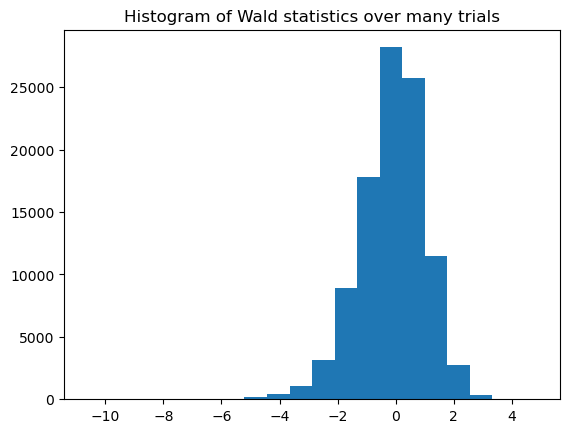

In [78]:
plt.hist(T, bins=20)
plt.title('Histogram of Wald statistics over many trials')
plt.show()

We falsely reject the null hypothesis whenever $|W| > z_{\alpha/2}$. So "err" below counts the number of times that the null hypothesis was falsely rejected, divided by the number of total Wald tests performed.

In [79]:
err = np.sum(np.abs(T) > z) / len(T)

In [80]:
print('Observed type I error rate for n=20: {0:.5f}'.format(err))

Observed type I error rate for n=20: 0.08131


So we see that in fact the type I error rate, $0.081$ is larger than $0.05$. This is probably because the sample size $n=20$ is relatively small, so the distribution of the means of the samples is not close enough to being normal. Indeed you can check that increasing $n$ causes the Type I error rate to decrease towards $0.05$.

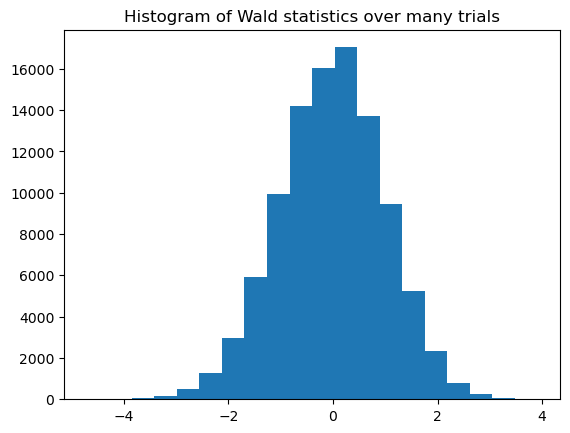

Observed type I error rate for n=500: 0.05021


In [81]:
B = int(1e5)
lambda_0 = 1
n = 500
alpha = 0.05
z = norm.ppf(1-alpha/2, loc=0, scale=1)
T = np.empty(B)

for i in range(B):
    X = poisson.rvs(lambda_0, size=n)
    lambda_hat = np.mean(X)
    sigma_hat = np.std(X)
    W = np.sqrt(n) * (lambda_hat - lambda_0) / sigma_hat
    T[i] = W

plt.hist(T, bins=20)
plt.title('Histogram of Wald statistics over many trials')
plt.show()

err = np.sum(np.abs(T) > z) / len(T)
print('Observed type I error rate for n=500: {0:.5f}'.format(err))